## Sentiment Analysis

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Sample dataset, Give more data to teach the model
data = {
    "Text": [
        "I love this movie!",
        "The live show was terrible",
        "This is the worst experience ever.", 
        "It was okay, nothing special.", 
        "Absolutely amazing service!", 
        "I hate waiting in long queues!",
        "I love living in bangalore",
        "I hate the show!", 
        "The show was bad",
        "The dogs behaviour was bad",
        "The food was plain",
        "The food tasted good!",
        "The music was okay",
        "The wind felt good"
    ],
    "Sentiment": ["Positive", "Negative", "Negative", "Neutral", "Positive", "Negative", "Positive", "Negative", "Negative", "Negative", "Neutral", "Positive", "Neutral", "Positive"]
}

df = pd.DataFrame(data)

# Convert labels into numeric values
df['Sentiment'] = df['Sentiment'].map({"Positive": 1, "Negative": 0, "Neutral": 2})

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2, random_state=42)

# Create a text processing and classification pipeline
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Predict on test data
sample_text = ["I absolutely love this!", "This is Bad!", "The service was okay."]
predictions = model.predict(sample_text)

# Print results
for text, sentiment in zip(sample_text, predictions):
    print(f"Text: {text} -> Sentiment: {['Negative', 'Positive', 'Neutral'][sentiment]}")

Text: I absolutely love this! -> Sentiment: Positive
Text: This is Bad! -> Sentiment: Negative
Text: The service was okay. -> Sentiment: Neutral


## Support Vector Machine (SVM) Algorithm

Model Accuracy: 0.90


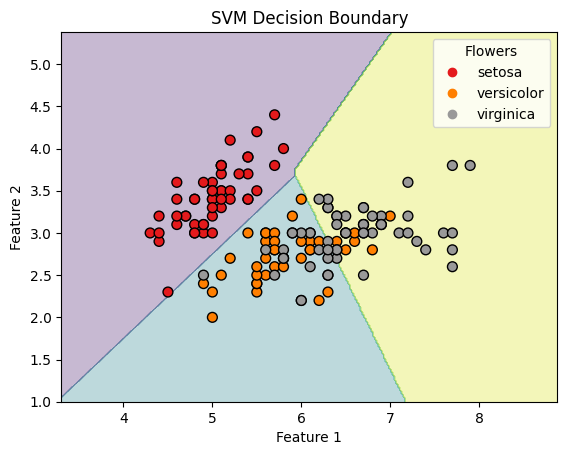

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only first two features for easy visualization
y = iris.target

# Split dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier
svm_model = SVC(kernel='linear')  # You can try 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Plot Decision Boundary
def plot_decision_boundary(X, y, model):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    
    # Create a scatter plot for the training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.Set1)
    
    # Create a legend
    handles, labels = scatter.legend_elements()
    plt.legend(handles, iris.target_names, title="Flowers")
    
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM Decision Boundary")
    plt.show()

plot_decision_boundary(X, y, svm_model)